In [77]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import sys
import scipy
from IPython.core.display import HTML
HTML("<style>.container { width:85% !important; }</style>")

In [85]:
paths = ['/home/j/jt/jt306/PycharmProjects','/home/j/jt/jt306/PycharmProjects/FeatureSelectionPython278']
for item in paths:
    if item not in sys.path:
        sys.path.insert(0,item)
print(sys.path)
import FeatureSelectionPython278 as pj

['/home/j/jt/jt306/PycharmProjects/FeatureSelectionPython278', '/home/j/jt/jt306/PycharmProjects', '/home/j/jt/jt306/caffe/python', '/Volumes/LocalDataHD/j/jt/jt306/Documents/Notebooks', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python35.zip', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/plat-darwin', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/lib-dynload', '/home/j/jt/jt306/.local/lib/python3.5/site-packages', '/usr/local/lib/python2.7/site-packages', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/aeosa', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/IPython/extensions', '/Volumes/LocalDataHD

## Original settings: 295 TechTC datasets - top 300 features chosen with RFE

In [106]:
from FeatureSelectionPython278 import ProcessNumpyResults as PNR 
lufe_baseline = PNR.Setting(295,'lupi',300,'cross-val',100, '')
svm_baseline = PNR.Setting(295,'svm',300,'cross-val',100, '')
all_baseline = PNR.Setting(295,'baseline',300,'cross-val',100, '')
dsvm = PNR.Setting(295,'dsvm',300,'cross-val',100, '')
# ProcessNumpyResults.compare_two_settings(lufe_baseline, svm_baseline)
import imp
imp.reload(PNR)




<module 'FeatureSelectionPython278.ProcessNumpyResults' from '/home/j/jt/jt306/PycharmProjects/FeatureSelectionPython278/ProcessNumpyResults.py'>

### RFE SVM vs All features SVM

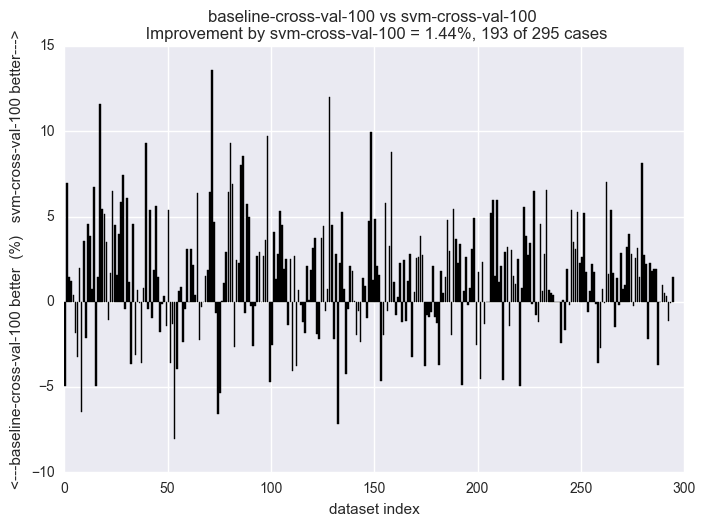

In [107]:
PNR.plot_bars(all_baseline,svm_baseline)

### LUFe vs RFE SVM

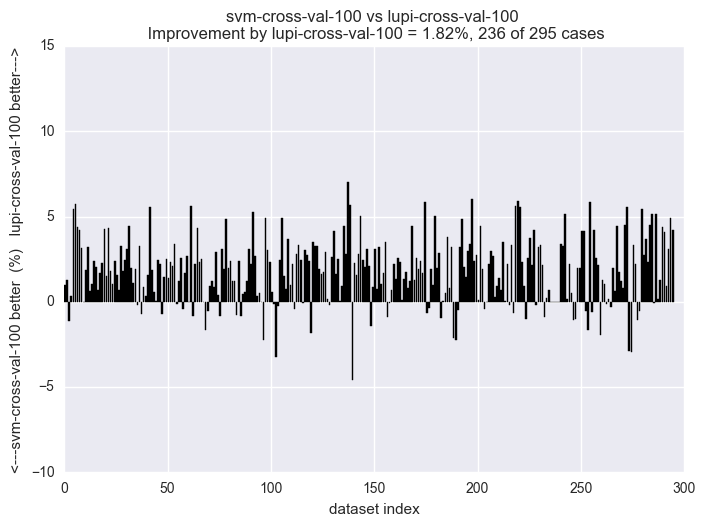

In [103]:
PNR.plot_bars(svm_baseline,lufe_baseline)

### LUFe vs All features SVM

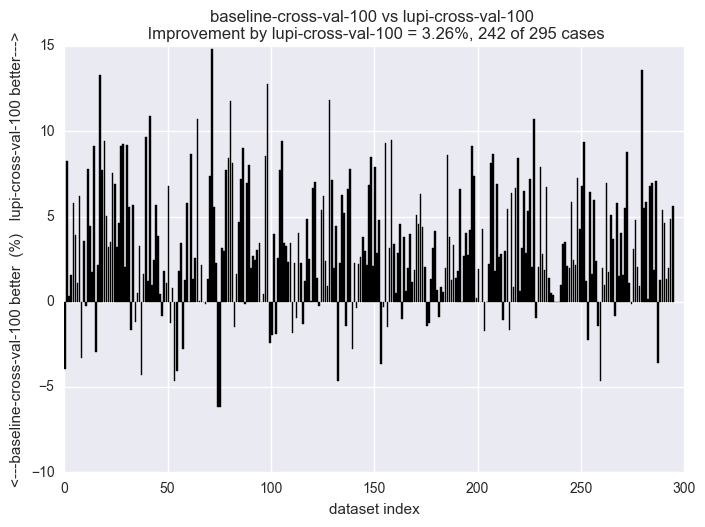

In [105]:
PNR.plot_bars(all_baseline,lufe_baseline)

## Other feature selection methods

### 